In [3]:
# Packages needed 
from ta import add_all_ta_features
import numpy as np
import math
from src.config import config
from src.dataset.cryptodownloader import CryptoDownloader

## Technical indicators 
We will add to the dataframe all the technical indicators provided by the library ta. Then we concentrate to the indicators related to volatility, momentum and trend and we eliminat the indicators who are correlated. We will use the first six month of the data, that it is the same amount of data used to calculate the covarance matrix. 

In [ ]:
data_downloader = CryptoDownloader(config.START_DATE, config.END_DATE, config.MULTIPLE_TICKER_8, config.DATA_SAVE_DIR, config.DATA_GRANULARITY)
df_initial = data_downloader.load()
df = df_initial[df_initial["tic"] == "btc"].iloc[0:24 * 30 * 6 ,0:7]
df_indicators =  add_all_ta_features(df, open="open", high="high", low="low", close="close", volume="volume")

In [3]:
df

,date,open,high,low,close,volume,tic,volume_adi,volume_obv,volume_cmf,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,2020-01-01 00:00:00,7195.24,7196.25,7175.46,7177.02,511.814901,btc,-435.005738,511.814901,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.981626,NaN,0.000000
1,2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,883.052603,btc,1.396939,1394.867504,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546884,0.545394,0.546884
2,2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809,btc,577.449339,2050.024313,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368334,0.367658,0.917233
3,2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,783.724867,btc,107.841399,1266.299446,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246312,-0.246616,0.668662
4,2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,467.812578,btc,-219.971156,798.486868,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107128,-0.107185,0.560818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29851,2020-06-28 19:00:00,9153.63,9170.00,9102.50,9112.64,1405.511967,btc,771776.163343,147470.024376,0.170076,...,-34.111092,84.792353,9120.726876,0.992454,-6.917078,-4.547673,-2.369406,-0.446387,-0.447386,26.969689
29852,2020-06-28 20:00:00,9112.12,9146.00,9090.00,9114.26,1242.186376,btc,771610.242735,148712.210752,0.171374,...,-38.364245,79.819029,9120.229818,0.663227,-8.187959,-5.275730,-2.912229,0.017778,0.017776,26.992261
29853,2020-06-28 21:00:00,9114.27,9132.85,9093.87,9128.63,743.687044,btc,772192.905698,149455.897796,0.192109,...,-33.191421,70.742765,9121.002038,0.590853,-11.844407,-6.589465,-5.254941,0.157665,0.157541,27.192484
29854,2020-06-28 22:00:00,9128.77,9134.56,9075.94,9104.40,1278.309121,btc,772155.834298,148177.588675,0.188178,...,-50.773921,65.689912,9120.209004,0.587878,-11.816280,-7.634828,-4.181452,-0.265429,-0.265782,26.854878


In [4]:
indicators = [column for column in df_indicators.columns if column.startswith(('volatility', "momentum", 'trend'))]
corr_df = df_indicators[indicators].corr()
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > 0.70)]
to_keep = [column for column in indicators  if  column not in to_drop]
to_keep

['volatility_atr',
 'volatility_bbm',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kchi',
 'volatility_kcli',
 'trend_macd_diff',
 'trend_adx',
 'trend_mass_index',
 'trend_dpo',
 'trend_aroon_up',
 'trend_aroon_down',
 'trend_psar_up_indicator',
 'trend_psar_down_indicator',
 'trend_stc',
 'momentum_ppo',
 'momentum_ppo_hist']

# Sharpe ratio

We look at the first 6 months and calculate the sharpe ratio of teh strategy of holding.


In [4]:
data_downloader = CryptoDownloader_binance(config.START_DATE, config.END_DATE, config.MULTIPLE_TICKER_8, config.DATA_SAVE_DIR, config.DATA_GRANULARITY)
df_initial = data_downloader.load()
df = df_initial[df_initial["tic"] == "btc"].iloc[0:24 * 30 * 6 ,0:7]

,date,open,high,low,close,volume,tic
0,2020-01-01 00:00:00,7195.24,7196.25,7175.46,7177.02,511.814901,btc
1,2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,883.052603,btc
2,2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809,btc
3,2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,783.724867,btc
4,2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,467.812578,btc
...,...,...,...,...,...,...,...
29851,2020-06-28 19:00:00,9153.63,9170.00,9102.50,9112.64,1405.511967,btc
29852,2020-06-28 20:00:00,9112.12,9146.00,9090.00,9114.26,1242.186376,btc
29853,2020-06-28 21:00:00,9114.27,9132.85,9093.87,9128.63,743.687044,btc
29854,2020-06-28 22:00:00,9128.77,9134.56,9075.94,9104.40,1278.309121,btc


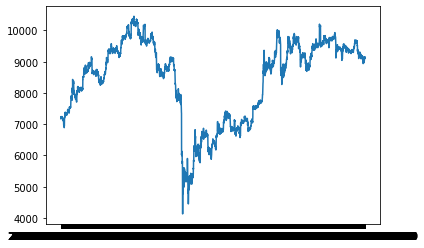

In [8]:
import matplotlib.pyplot as plt
plt.plot(df['date'], df['close'])
plt.show()

In [44]:
from empyrical import sortino_ratio, calmar_ratio, omega_ratio, sharpe_ratio
  
def _reward(self):
    length = min(self.current_step, self.reward_len)
    returns = np.diff(self.net_worths)[-length:]

    if self.reward_func == 'sortino':
          reward = sortino_ratio(returns)
    elif self.reward_func == 'calmar':
          reward = calmar_ratio(returns)
    elif self.reward_func == 'omega':
          reward = omega_ratio(returns)
    else:
          reward = np.mean(returns)

    return reward if abs(reward) != math.inf and not np.isnan(reward) else 0

In [11]:
df

,date,open,high,low,close,volume,tic
0,2020-01-01 00:00:00,7195.24,7196.25,7175.46,7177.02,511.814901,btc
1,2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,883.052603,btc
2,2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809,btc
3,2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,783.724867,btc
4,2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,467.812578,btc
...,...,...,...,...,...,...,...
29851,2020-06-28 19:00:00,9153.63,9170.00,9102.50,9112.64,1405.511967,btc
29852,2020-06-28 20:00:00,9112.12,9146.00,9090.00,9114.26,1242.186376,btc
29853,2020-06-28 21:00:00,9114.27,9132.85,9093.87,9128.63,743.687044,btc
29854,2020-06-28 22:00:00,9128.77,9134.56,9075.94,9104.40,1278.309121,btc


In [53]:
pcn = df['close'].pct_change()
sharpe = sharpe_ratio(pcn)
print(sharpe)

In [ ]:
import pandas